# Single Layer LSTM

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL3H842/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL3H842/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL3H842/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [ ]:
tokenizer = info.features["text"].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 128

In [ ]:
train_data, test_data = dataset["train"], dataset["test"]

In [ ]:
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [ ]:
import tensorflow as tf 

embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
EPOCHS = 10

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

Epoch 1/10
196/196 [==============================] - 44s 206ms/step - loss: 0.5231 - accuracy: 0.7254 - val_loss: 0.4125 - val_accuracy: 0.8226
Epoch 2/10
196/196 [==============================] - 46s 232ms/step - loss: 0.3245 - accuracy: 0.8701 - val_loss: 0.4987 - val_accuracy: 0.7995
Epoch 3/10
196/196 [==============================] - 39s 198ms/step - loss: 0.2660 - accuracy: 0.8996 - val_loss: 0.4000 - val_accuracy: 0.8308
Epoch 4/10
196/196 [==============================] - 39s 196ms/step - loss: 0.2879 - accuracy: 0.8815 - val_loss: 0.4212 - val_accuracy: 0.8319
Epoch 5/10
196/196 [==============================] - 46s 236ms/step - loss: 0.2000 - accuracy: 0.9268 - val_loss: 0.4516 - val_accuracy: 0.8428
Epoch 6/10
196/196 [==============================] - 35s 177ms/step - loss: 0.2172 - accuracy: 0.9162 - val_loss: 0.4776 - val_accuracy: 0.8348
Epoch 7/10
196/196 [==============================] - 37s 189ms/step - loss: 0.1340 - accuracy: 0.9530 - val_loss: 0.4885 - val_ac

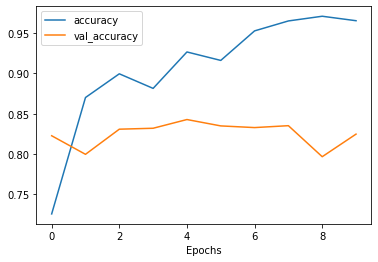

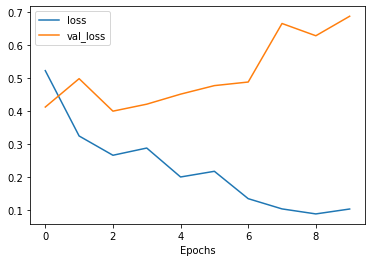

In [ ]:
def plot_graphs(history, s):
  import matplotlib.pyplot as plt
  plt.plot(history.history[s])
  plt.plot(history.history["val_"+s])
  plt.legend([s, "val_"+s])
  plt.xlabel("Epochs")
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Multiple LSTMs

In [ ]:
lstm_dim1=64
lstm_dim2=32
#lstm_dim3=16

dense_dim=8

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim1, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim2)),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history2 = model2.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

Epoch 1/10
196/196 [==============================] - 88s 424ms/step - loss: 0.6932 - accuracy: 0.5095 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
196/196 [==============================] - 83s 421ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
196/196 [==============================] - 62s 314ms/step - loss: 0.6092 - accuracy: 0.6478 - val_loss: 0.4980 - val_accuracy: 0.7716
Epoch 4/10
196/196 [==============================] - 61s 310ms/step - loss: 0.5273 - accuracy: 0.7380 - val_loss: 0.6500 - val_accuracy: 0.6295
Epoch 5/10
196/196 [==============================] - 60s 307ms/step - loss: 0.5715 - accuracy: 0.7032 - val_loss: 0.6647 - val_accuracy: 0.6022
Epoch 6/10
196/196 [==============================] - 61s 309ms/step - loss: 0.5488 - accuracy: 0.7296 - val_loss: 0.5499 - val_accuracy: 0.7276
Epoch 7/10
196/196 [==============================] - 60s 308ms/step - loss: 0.4155 - accuracy: 0.8183 - val_loss: 0.5327 - val_ac

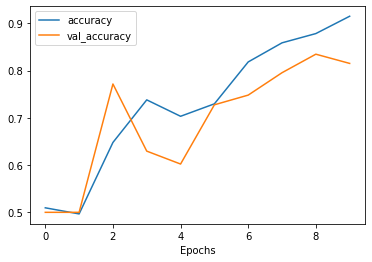

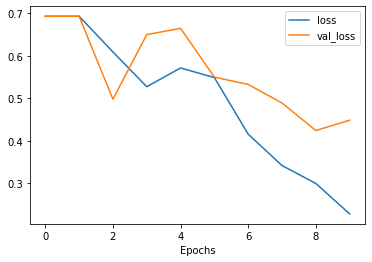

In [ ]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

####Hmmm

In [ ]:
import numpy as np

batch_size = 64
timesteps = 32
features = 128

i = np.random.randn(batch_size, timesteps, features)
i.shape

(64, 32, 128)

In [ ]:
# lstm with 16 dimensionality
tf.keras.layers.LSTM(16)(i).shape

TensorShape([64, 16])

In [ ]:
random_input = np.random.rand(batch_size,timesteps,features)
tf.keras.layers.Conv1D(128, 5)(random_input).shape

TensorShape([64, 28, 128])

In [ ]:
tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(i).shape

TensorShape([64, 62, 32])

In [ ]:
tf.keras.layers.GlobalMaxPooling1D()(i).shape

TensorShape([64, 128])

# With Conv Layer

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation="relu"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim1, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim2)),
    #tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history3 = model3.fit(train_dataset, epochs=10, validation_data=test_dataset)

plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

Epoch 1/10
196/196 [==============================] - 109s 350ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
196/196 [==============================] - 68s 345ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
196/196 [==============================] - 78s 397ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
196/196 [==============================] - 75s 380ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
171/196 [=========================>....] - ETA: 6s - loss: 0.6932 - accuracy: 0.4963

KeyboardInterrupt: ignored

# Sarcasm Detection by Using Conv1D

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-10-10 12:19:21--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2022-10-10 12:19:21 (316 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

fname = "/content/sarcasm.json"

with open(fname) as f:
  datastore= json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

In [ ]:
training_size = 20000

In [ ]:
train_s = sentences[:training_size]
test_s = sentences[training_size:]

train_l = labels[:training_size]
test_l = labels[training_size:]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size=10000
maxlen=120
trunc_type="post"
padding_type="post"
oov_token = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

In [ ]:
tokenizer.fit_on_texts(train_s)
train_idx = tokenizer.word_index
train_seq = tokenizer.texts_to_sequences(train_s)

In [ ]:
padded = pad_sequences(train_seq, maxlen=maxlen, truncating=trunc_type, padding=padding_type)

In [ ]:
len(train_idx.keys())

25637

In [ ]:
padded.shape

(20000, 120)

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_s)
padded_test = pad_sequences(test_seq, maxlen=maxlen, padding=padding_type, truncating=trunc_type)

In [ ]:
padded_test.shape

(6709, 120)

In [ ]:
train_labels = np.array(train_l)
test_labels = np.array(test_l)

In [ ]:
train_labels.shape, test_labels.shape

((20000,), (6709,))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=maxlen),
    tf.keras.layers.Conv1D(128, 3, activation="relu"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(x=padded, y=train_labels, epochs=EPOCHS, validation_data=(padded_test, test_labels))

Epoch 1/10
625/625 [==============================] - 12s 15ms/step - loss: 0.3901 - accuracy: 0.8120 - val_loss: 0.3313 - val_accuracy: 0.8563
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 0.1898 - accuracy: 0.9240 - val_loss: 0.3455 - val_accuracy: 0.8575
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0876 - accuracy: 0.9685 - val_loss: 0.4547 - val_accuracy: 0.8509
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.6479 - val_accuracy: 0.8474
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.7771 - val_accuracy: 0.8423
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.7884 - val_accuracy: 0.8436
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.8660 - val_accuracy: 0.835

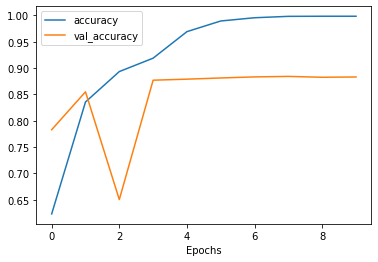

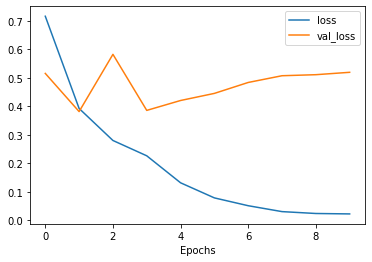

In [ ]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

# NLP IMDB

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK7SB3C/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK7SB3C/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK7SB3C/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = imdb["train"], imdb["test"]

train_s = []
test_s = []

train_l = []
test_l = []

for s, l in train_data:
  train_s.append(s.numpy().decode("utf8"))
  train_l.append(l.numpy())

for s,l in test_data:
  test_s.append(s.numpy().decode("utf8"))
  test_l.append(l.numpy())

train_l = np.array(train_l)
test_l = np.array(test_l)

In [5]:
vocab_size= 10000
maxlen=120
oov_token = "<OOV>"
trunc = "post"
pad = "post"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_s)

seq_train = tokenizer.texts_to_sequences(train_s)
padded_train = pad_sequences(seq_train, maxlen=maxlen, truncating=trunc, padding=pad)

seq_test = tokenizer.texts_to_sequences(test_s)
padded_test = pad_sequences(seq_test, maxlen=maxlen, truncating=trunc, padding=pad)

In [8]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Flatten

In [15]:
embedding_dim = 16
dense_dim = 6

BATCH_SIZE=128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist1 = model.fit(padded_train, train_l, epochs=10, validation_data=(padded_test, test_l))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.4919 - accuracy: 0.7411 - val_loss: 0.3777 - val_accuracy: 0.8288
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2361 - accuracy: 0.9086 - val_loss: 0.4109 - val_accuracy: 0.8187
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0892 - accuracy: 0.9774 - val_loss: 0.4997 - val_accuracy: 0.8129
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0231 - accuracy: 0.9973 - val_loss: 0.5927 - val_accuracy: 0.8089
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.6657 - val_accuracy: 0.8094
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.7294 - val_accuracy: 0.8079
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 9.0072e-04 - accuracy: 1.0000 - val_loss: 0.7806 - val_accuracy: 0.8090
Ep

In [16]:
plot_graphs(hist1, "loss")
plot_graphs(hist1, "accuracy")

NameError: ignored

In [ ]:
embedding_dim = 16
dense_dim = 6

BATCH_SIZE=128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist2 = model.fit(padded_train, train_l, batch_size=BATCH_SIZE, epochs=10, validation_data=(padded_test, test_l))

In [ ]:
plot_graphs(hist2, "loss")
plot_graphs(hist2, "accuracy")

# LSTM

In [ ]:
lstm_dim=32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist3 = model.fit(padded_train, train_l, batch_size=BATCH_SIZE, epochs=10, validation_data=(padded_test, test_l))

In [ ]:
plot_graphs(hist3, "loss")
plot_graphs(hist3, "accuracy")

# GRU

In [ ]:
gru_dim=32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist4 = model.fit(padded_train, train_l, batch_size=BATCH_SIZE, epochs=10, validation_data=(padded_test, test_l)
plot_graphs(hist4, "loss")
plot_graphs(hist4, "accuracy")

# Conv1D

In [ ]:
gru_dim=32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(128, 5, activation="relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist4 = model.fit(padded_train, train_l, batch_size=BATCH_SIZE, epochs=10, validation_data=(padded_test, test_l)
plot_graphs(hist4, "loss")
plot_graphs(hist4, "accuracy")

In [1]:
import numpy as np

a = np.random.randn(16, 32, 8)
a.shape

(16, 32, 8)

In [3]:
import tensorflow as tf
tf.keras.layers.Conv1D(128, 5, activation='relu')(a).shape

TensorShape([16, 28, 128])

In [ ]:
x = tf.keras.layers.Conv1D(128, 5, activation='relu')(a)
tf.keras.layers.GlobalAveragePooling1D()(x).shape